# Real data analysis

#### Data
1. Inventory data (detector for each zone)
2. Zone data (speed and volume of each zone)
3. Crash data

The data needed to be proceed a lot before using them for building model. The challenges are listed below.

#### Challenges
1. Data needs to be processed in such manner that the data can be defined for each link
2. There are no links defined
3. Zone data has only zone ID which are meaningless without lat and long values
4. Crash data have lat and long values but no zone ID defined

#### Solutions to the challenges
1. A buffer is created on qgis with Begin and end post. Begin and end post would be the starting and ending point of each link (nodes)
2. inventory data has been joined with the buffer. This provides the data with begin and end post
3. Crash data has been joined with the buffer. This provides the data with begin and end post
4. Crash data has been joined with the inventory data (both buffered ones). This provides zone ID for each crash data (Challenge 4)
5. inventory data has been used to screen out only the zone data that is needed. This makes easier to handle the big zone data. 
6. zone data has been joined with inventory data (buffered). This provides begin and end post for zone data (Challenge 3)
7. Begin and end post has been used to make links (Challenge 2)
7. Final step is to join the processed zone and crash data before using it to make model

### Import Necessary packages

In [1]:
import pandas as pd
import csv
import datetime 
import numpy as np
import matplotlib.pyplot as plt

### Importing inventory data and getting rid of unnecessary columns

In [2]:
df = pd.read_csv('inv.csv')

In [3]:
df.columns

Index(['zone_id', 'display_name', 'state', 'rtmc', 'timezone', 'road',
       'direction', 'location_description', 'lane_type', 'organization',
       'detector_type', 'latitude', 'longitude', 'bearing', 'default_speed',
       'interval', 'length', 'FID', 'ROADWAY', 'COLOR_CODE', 'DISTRICT',
       'COUNTYDOT', 'COUNTY', 'MNG_DIST', 'BEGIN_POST', 'END_POST',
       'Shape_Leng', 'Shape__Len'],
      dtype='object')

In [4]:
df.drop(['display_name', 'state', 'rtmc', 'timezone', 'road',
       'direction', 'location_description', 'lane_type', 'organization',
       'detector_type', 'latitude', 'longitude', 'bearing', 'default_speed',
       'interval', 'length', 'FID', 'ROADWAY', 'COLOR_CODE', 'DISTRICT',
       'COUNTYDOT', 'COUNTY', 'MNG_DIST','Shape_Leng', 'Shape__Len'],axis = 1,inplace = True)

In [5]:
df

,zone_id,BEGIN_POST,END_POST
0,3816,2.0,4.0
1,4039,2.0,4.0
2,5651,2.0,4.0
3,14436,2.0,4.0
4,14501,2.0,4.0
...,...,...,...
452,11293,14.0,17.0
453,11452,14.0,17.0
454,11504,14.0,17.0
455,6371,17.0,18.0


### Importing and processing crash data

In [6]:
df1 = pd.read_csv('crash.csv')

In [7]:
df1.head()

,HSMV_Report_Number,Agency_Report_Number,Reporting_Agency,Form_Type,Crash_Date,Crash_Time,City,County,Crash_Street,Intersecting_Street,...,ROADWAY,COLOR_CODE,DISTRICT,COUNTYDOT,COUNTY_2,MNG_DIST,BEGIN_POST,END_POST,Shape_Leng,Shape__Len
0,89392064,20I020856,Osceola Co SO,Short,02:26:20,04:58 PM,Unincorporated,Osceola,W IRLO BRONSON MEMORIAL HWY,INTERNATIONAL DR S,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN
1,88335416,FHPD20OFF041282,FHP,Long,02:19:20,03:40 PM,Kissimmee,Osceola,OSCEOLA PKWY,STATE ROAD 417,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN
2,89392065,20I020873,Osceola Co SO,Short,02:26:20,04:58 PM,Unincorporated,Osceola,W IRLO BRONSON MEMORIAL HWY,INTERNATIONAL DR S,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN
3,89392122,20I026347,Osceola Co SO,Short,03:12:20,11:20 AM,Unincorporated,Osceola,RAMP FROM SR 417 TO CR 522,CR 522 OSCEOLA PKWY,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN
4,88311114,FHPD20OFF022397,FHP,Long,03:14:20,01:12 PM,Kissimmee,Osceola,OSCEOLA PKWY,SERALAGO BLVD,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN


In [9]:
df1.tail()

,HSMV_Report_Number,Agency_Report_Number,Reporting_Agency,Form_Type,Crash_Date,Crash_Time,City,County,Crash_Street,Intersecting_Street,...,ROADWAY,COLOR_CODE,DISTRICT,COUNTYDOT,COUNTY_2,MNG_DIST,BEGIN_POST,END_POST,Shape_Leng,Shape__Len
659,88293004,FHPD20OFF011893,FHP,Long,02:10:20,04:58 PM,Orlando,Orange,STATE ROAD 417 (GREENEWAY EXPY) RAMP,BOGGY CREEK ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,NaN
660,89821305,2020-00041211,Orlando PD,Short,02:03:20,05:48 PM,Orlando,Orange,HEINTZELMAN BV,JEFF FUQUA BLVD,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,NaN
661,89821664,2020-00067229,Orlando PD,Short,02:23:20,12:50 PM,Orlando,Orange,BOGGY CREEK RD,SR417,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,NaN
662,88308129,FHPD20OFF022307,FHP,Long,03:14:20,06:00 AM,Orlando,Orange,ACCESS ROAD,BOGGY CREEK ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,NaN
663,89820407,2020-00041918,Orlando PD,Long,02:04:20,08:15 AM,Orlando,Orange,S.R. 528 / BEE LINE EXPRESSWAY (WEST),S.R. 436 / S. SEMORAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,NaN,NaN


In [10]:
df1.drop(['HSMV_Report_Number', 'Agency_Report_Number', 'Reporting_Agency',
       'Form_Type','City', 'County',
       'Crash_Street', 'Intersecting_Street', 'Offset_Distance',
       'Offset_Direction', 'Crash_Type', 'Vehicles', 'Non_Motorists',
       'Fatalities', 'Injuries', 'Alcohol_Related', 'Distraction_Related',
       'Drug_Related', 'Estimated_Damages', 'Weather_Condition',
       'Light_Condition', 'Street_Number', 'Crash_Type_Detailed',
       'Crash_Type_Dir', 'Crash_Severity', 'Within_City_Limits',
       'Manner_of_Collision', 'First_Harmful_Event', 'First_HE_Location',
       'First_HE_Relation_to_Jct', 'First_HE_Within_Interchange',
       'Type_of_Intersection', 'Road_Sys_Identifier', 'Type_of_Shoulder',
       'Road_Surf_Cond', 'Contrib_Circum_Road1', 'Contrib_Circum_Road2',
       'Contrib_Circum_Road3', 'Contrib_Circum_Env1', 'Contrib_Circum_Env2',
       'Contrib_Circum_Env3', 'School_Bus_Related', 'Work_Zone_Related',
       'Type_of_Work_Zone', 'Loc_in_Work_Zone', 'Workers_in_Work_Zone',
       'Law_Enforcement_in_Work_Zone', 'Mopeds', 'Motorcycles', 'Passengers',
       'Bicyclists', 'Pedestrians', 'Fatalities_Unrestrained',
       'Injuries_Unrestrained', 'Possible_Injuries',
       'Non_Incapacitating_Injuries', 'Incapacitating_Injuries',
       'Fatalities_30_Days', 'Non_Traffic_Fatalities', 'Transported_by_EMS',
       'Transported_by_Law_Enforcement', 'Transported_by_Other', 'Citations',
       'Property_Dmg_Amt', 'Vehicle_Dmg_Amt', 'S4_Mapping',
       'S4_Decimal_Degree_Longitude', 'S4_Decimal_Degree_Latitude',
       'S4_Albers_X', 'S4_Albers_Y', 'S4_Mapping_Date', 'FID', 'ROADWAY',
       'COLOR_CODE', 'DISTRICT', 'COUNTYDOT', 'COUNTY_2', 'MNG_DIST','Shape_Leng', 'Shape__Len','Shape_Leng'],axis = 1,inplace = True)

In [11]:
df1.columns

Index(['Crash_Date', 'Crash_Time', 'BEGIN_POST', 'END_POST'], dtype='object')

#### Making two new columns for model building purpose

In [12]:
df1['crash_num']=1

In [13]:
df1['crash'] = 'yes'

In [14]:
df1

,Crash_Date,Crash_Time,BEGIN_POST,END_POST,crash_num,crash
0,02:26:20,04:58 PM,2.0,4.0,1,yes
1,02:19:20,03:40 PM,2.0,4.0,1,yes
2,02:26:20,04:58 PM,2.0,4.0,1,yes
3,03:12:20,11:20 AM,4.0,3.0,1,yes
4,03:14:20,01:12 PM,4.0,3.0,1,yes
...,...,...,...,...,...,...
659,02:10:20,04:58 PM,17.0,18.0,1,yes
660,02:03:20,05:48 PM,17.0,18.0,1,yes
661,02:23:20,12:50 PM,17.0,18.0,1,yes
662,03:14:20,06:00 AM,17.0,18.0,1,yes


#### Getting the month, day, hour and min for crash data

In [15]:
df1['date'] = df1['Crash_Date'].str[:8]

In [16]:
df1['date'] = pd.to_datetime(df1['date'], format = '%m:%d:%y')

In [17]:
df1['time'] = pd.to_datetime(df1['Crash_Time'], format = '%I:%M %p')

In [18]:
df1['month'] = df1['date'].dt.month

In [19]:
df1['day'] = df1['date'].dt.day

In [20]:
df1['hour'] = df1['time'].dt.hour

In [21]:
df1['min'] = df1['time'].dt.minute

In [22]:
df1.drop(['Crash_Date', 'Crash_Time','time','date'],axis = 1,inplace = True)

In [23]:
df1

,BEGIN_POST,END_POST,crash_num,crash,month,day,hour,min
0,2.0,4.0,1,yes,2,26,16,58
1,2.0,4.0,1,yes,2,19,15,40
2,2.0,4.0,1,yes,2,26,16,58
3,4.0,3.0,1,yes,3,12,11,20
4,4.0,3.0,1,yes,3,14,13,12
...,...,...,...,...,...,...,...,...
659,17.0,18.0,1,yes,2,10,16,58
660,17.0,18.0,1,yes,2,3,17,48
661,17.0,18.0,1,yes,2,23,12,50
662,17.0,18.0,1,yes,3,14,6,0


### Joining crash data with inventory to get zone id for crash data

In [24]:
df2 = df1.join(df.set_index(['BEGIN_POST','END_POST']), on=['BEGIN_POST','END_POST'])

In [25]:
df2.to_csv('df2.csv')  # just to check

In [26]:
df2

,BEGIN_POST,END_POST,crash_num,crash,month,day,hour,min,zone_id
0,2.0,4.0,1,yes,2,26,16,58,3816.0
0,2.0,4.0,1,yes,2,26,16,58,4039.0
0,2.0,4.0,1,yes,2,26,16,58,5651.0
0,2.0,4.0,1,yes,2,26,16,58,14436.0
0,2.0,4.0,1,yes,2,26,16,58,14501.0
...,...,...,...,...,...,...,...,...,...
661,17.0,18.0,1,yes,2,23,12,50,6740.0
662,17.0,18.0,1,yes,3,14,6,0,6371.0
662,17.0,18.0,1,yes,3,14,6,0,6740.0
663,17.0,18.0,1,yes,2,4,8,15,6371.0


### Reading and processing zone data

In [30]:
df3 = pd.read_csv('Zone_Readings.csv')

In [31]:
zone = df['zone_id']

#### Getting only the zones that are needed

In [32]:
df4 = df3[df3['zone_id'].isin(zone)]

#### Getting the month, day, hour and min zone data

In [33]:
df4["date_time"] = df4['measurement_start'].str[:19]

<ipython-input-33-a43969d21b1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["date_time"] = df4['measurement_start'].str[:19]


In [34]:
df4["date_time"] = pd.to_datetime(df4["date_time"], format = '%Y-%m-%d %H:%M:%S')

<ipython-input-34-a233d187b9e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["date_time"] = pd.to_datetime(df4["date_time"], format = '%Y-%m-%d %H:%M:%S')


In [35]:
df4['month'] = df4["date_time"].dt.month

<ipython-input-35-c3bd6aa5c556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month'] = df4["date_time"].dt.month


In [36]:
df4['day'] = df4["date_time"].dt.day

<ipython-input-36-ac02ea3bd7b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['day'] = df4["date_time"].dt.day


In [37]:
df4['hour'] = df4["date_time"].dt.hour

<ipython-input-37-e4ac744c6e98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['hour'] = df4["date_time"].dt.hour


In [38]:
df4['min'] = df4["date_time"].dt.minute

<ipython-input-38-10e1c66c6fe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['min'] = df4["date_time"].dt.minute


In [39]:
df4.drop(['measurement_start', 'date_time'],axis = 1,inplace = True)

/Users/fatimaafifah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
df4.drop(['quality'],axis = 1,inplace = True)

In [44]:
df4.head()

,zone_id,speed,volume,occupancy,month,day,hour,min
26761,14720,0.000000,0,0.00,2,1,0,0
26762,14720,67.000000,2,2.75,2,1,0,1
26763,14720,68.666667,3,2.50,2,1,0,1
26764,14720,68.666667,3,3.00,2,1,0,2
26765,14720,66.666667,3,3.25,2,1,0,2


In [42]:
df4.describe()

,zone_id,speed,volume,occupancy,month,day,hour,min
count,2.053729e+07,2.053729e+07,2.053729e+07,2.053729e+07,2.053729e+07,2.053729e+07,2.053729e+07,2.053729e+07
mean,1.001714e+04,5.929709e+01,1.514837e+01,3.835196e+00,3.003194e+00,1.551878e+01,1.157725e+01,2.950262e+01
std,3.903114e+03,2.532658e+01,2.390738e+01,5.300658e+00,8.272139e-01,8.842281e+00,6.864011e+00,1.731249e+01
min,3.481000e+03,-1.634400e+04,0.000000e+00,-1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.559000e+03,5.150000e+01,3.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01
50%,9.723000e+03,6.733333e+01,9.000000e+00,2.250000e+00,3.000000e+00,1.500000e+01,1.200000e+01,3.000000e+01
75%,1.408300e+04,7.308333e+01,2.200000e+01,5.000000e+00,4.000000e+00,2.300000e+01,1.700000e+01,4.500000e+01
max,1.644400e+04,1.530000e+02,3.278100e+04,1.000000e+02,4.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


#### To get the BEGIN_POST and END_POST in zone data

In [38]:
df5 = df4.join(df.set_index(['zone_id']), on=['zone_id'])

In [39]:
df5

,zone_id,speed,volume,occupancy,month,day,hour,min,BEGIN_POST,END_POST
26761,14720,0.000000,0,0.00,2,1,0,0,5.0,11.0
26762,14720,67.000000,2,2.75,2,1,0,1,5.0,11.0
26763,14720,68.666667,3,2.50,2,1,0,1,5.0,11.0
26764,14720,68.666667,3,3.00,2,1,0,2,5.0,11.0
26765,14720,66.666667,3,3.25,2,1,0,2,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...
64232589,14501,54.000000,4,1.00,4,30,23,53,2.0,4.0
64232590,14501,51.500000,6,2.00,4,30,23,56,2.0,4.0
64232591,14501,53.500000,2,1.00,4,30,23,57,2.0,4.0
64232592,14501,53.500000,4,1.00,4,30,23,58,2.0,4.0


In [40]:
df5 = df5[df5.occupancy > 0]

In [41]:
df5

,zone_id,speed,volume,occupancy,month,day,hour,min,BEGIN_POST,END_POST
26762,14720,67.000000,2,2.75,2,1,0,1,5.0,11.0
26763,14720,68.666667,3,2.50,2,1,0,1,5.0,11.0
26764,14720,68.666667,3,3.00,2,1,0,2,5.0,11.0
26765,14720,66.666667,3,3.25,2,1,0,2,5.0,11.0
26766,14720,65.000000,2,2.75,2,1,0,3,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...
64232589,14501,54.000000,4,1.00,4,30,23,53,2.0,4.0
64232590,14501,51.500000,6,2.00,4,30,23,56,2.0,4.0
64232591,14501,53.500000,2,1.00,4,30,23,57,2.0,4.0
64232592,14501,53.500000,4,1.00,4,30,23,58,2.0,4.0


In [42]:
df5 = df5[df5.volume < 100]

In [43]:
df5

,zone_id,speed,volume,occupancy,month,day,hour,min,BEGIN_POST,END_POST
26762,14720,67.000000,2,2.75,2,1,0,1,5.0,11.0
26763,14720,68.666667,3,2.50,2,1,0,1,5.0,11.0
26764,14720,68.666667,3,3.00,2,1,0,2,5.0,11.0
26765,14720,66.666667,3,3.25,2,1,0,2,5.0,11.0
26766,14720,65.000000,2,2.75,2,1,0,3,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...
64232589,14501,54.000000,4,1.00,4,30,23,53,2.0,4.0
64232590,14501,51.500000,6,2.00,4,30,23,56,2.0,4.0
64232591,14501,53.500000,2,1.00,4,30,23,57,2.0,4.0
64232592,14501,53.500000,4,1.00,4,30,23,58,2.0,4.0


#### Averaging zone data over hour

In [44]:
Average_speed = df5.groupby(['zone_id','month','day','hour','BEGIN_POST','END_POST']).agg({'speed': 'mean'})

In [45]:
Flow = df5.groupby(['zone_id','month','day','hour','BEGIN_POST','END_POST']).agg({'volume': 'sum'})

In [46]:
zone_data = pd.concat([Average_speed, Flow], axis = 1)

In [47]:
zone_data

speed  volume
zone_id month day hour BEGIN_POST END_POST                   
3481    2     1   0    12.0       13.0      71.455240     894
                  1    12.0       13.0      70.977359     587
                  2    12.0       13.0      71.767098     416
                  3    12.0       13.0      69.573708     372
                  4    12.0       13.0      68.823282     456
...                                               ...     ...
16444   4     30  18   5.0        10.0      35.285714       6
                  19   5.0        10.0      42.500000       2
                  20   5.0        10.0      41.000000       1
                  22   5.0        10.0      42.000000       1
                  23   5.0        10.0      41.000000       2

[257193 rows x 2 columns]

In [48]:
zone_data.to_csv("zone_data.csv")

#### Aggregating crash data 

In [49]:
crash = df2.groupby(['zone_id','BEGIN_POST','END_POST','month','day','hour','crash']).agg({'crash_num': 'sum'})

In [50]:
crash 

crash_num
zone_id BEGIN_POST END_POST month day hour crash           
3481.0  12.0       13.0     2     1   14   yes            1
                                  2   11   yes            1
                                  3   7    yes            1
                                  5   9    yes            1
                                  10  9    yes            1
...                                                     ...
16922.0 5.0        11.0     4     8   18   yes            1
                                  9   14   yes            1
                                  10  6    yes            1
                                  15  13   yes            1
                                  23  11   yes            1

[13855 rows x 1 columns]

In [51]:
crash.to_csv('crash_analysis.csv')

#### Joining zone data with crash data

In [52]:
com = zone_data.join(crash, lsuffix='_caller', rsuffix='_crash')

In [53]:
com.to_csv('zone_crash.csv')

In [54]:
df6 = pd.read_csv('zone_crash.csv')

In [55]:
df6

,zone_id,month,day,hour,BEGIN_POST,END_POST,crash,speed,volume,crash_num
0,3481,2,1,0,12.0,13.0,NaN,71.455240,894,NaN
1,3481,2,1,1,12.0,13.0,NaN,70.977359,587,NaN
2,3481,2,1,2,12.0,13.0,NaN,71.767098,416,NaN
3,3481,2,1,3,12.0,13.0,NaN,69.573708,372,NaN
4,3481,2,1,4,12.0,13.0,NaN,68.823282,456,NaN
...,...,...,...,...,...,...,...,...,...,...
257188,16444,4,30,18,5.0,10.0,NaN,35.285714,6,NaN
257189,16444,4,30,19,5.0,10.0,NaN,42.500000,2,NaN
257190,16444,4,30,20,5.0,10.0,NaN,41.000000,1,NaN
257191,16444,4,30,22,5.0,10.0,NaN,42.000000,1,NaN


#### Filling empty cell with 'no' and '0'

In [56]:
df6['crash'] = df6['crash'].fillna(value='no')

In [57]:
df6['crash_num'] = df6['crash_num'].fillna(value=0)

In [58]:
df6.head()

,zone_id,month,day,hour,BEGIN_POST,END_POST,crash,speed,volume,crash_num
0,3481,2,1,0,12.0,13.0,no,71.455240,894,0.0
1,3481,2,1,1,12.0,13.0,no,70.977359,587,0.0
2,3481,2,1,2,12.0,13.0,no,71.767098,416,0.0
3,3481,2,1,3,12.0,13.0,no,69.573708,372,0.0
4,3481,2,1,4,12.0,13.0,no,68.823282,456,0.0


### Defining links using BEGIN_POST and END_POST

In [59]:
df6['link'] = 0

In [60]:
df6.loc[(df6.BEGIN_POST == 1) & (df6.END_POST == 2), 'link'] = '1_2'

In [61]:
df6.loc[(df6.BEGIN_POST == 1) & (df6.END_POST == 3), 'link'] = '1_3'

In [62]:
df6.loc[(df6.BEGIN_POST == 2) & (df6.END_POST == 4), 'link'] = '2_4'

In [63]:
df6.loc[(df6.BEGIN_POST == 4) & (df6.END_POST == 3), 'link'] = '4_3'

In [64]:
df6.loc[(df6.BEGIN_POST == 3) & (df6.END_POST == 5), 'link'] = '3_5'

In [65]:
df6.loc[(df6.BEGIN_POST == 4) & (df6.END_POST == 6), 'link'] = '4_6'

In [66]:
df6.loc[(df6.BEGIN_POST == 5) & (df6.END_POST == 10), 'link'] = '5_10'

In [67]:
df6.loc[(df6.BEGIN_POST == 5) & (df6.END_POST == 11), 'link'] = '5_11'

In [68]:
df6.loc[(df6.BEGIN_POST == 8) & (df6.END_POST == 16), 'link'] = '8_16'

In [69]:
df6.loc[(df6.BEGIN_POST == 8) & (df6.END_POST == 9), 'link'] = '8_9'

In [70]:
df6.loc[(df6.BEGIN_POST == 9) & (df6.END_POST == 14), 'link'] = '9_14'

In [71]:
df6.loc[(df6.BEGIN_POST == 9) & (df6.END_POST == 15), 'link'] = '9_15'

In [72]:
df6.loc[(df6.BEGIN_POST == 10) & (df6.END_POST == 14), 'link'] = '10_14'

In [73]:
df6.loc[(df6.BEGIN_POST == 11) & (df6.END_POST == 12), 'link'] = '11_12'

In [74]:
df6.loc[(df6.BEGIN_POST == 12) & (df6.END_POST == 13), 'link'] = '12_13'

In [75]:
df6.loc[(df6.BEGIN_POST == 13) & (df6.END_POST == 14), 'link'] = '13_14'

In [76]:
df6.loc[(df6.BEGIN_POST == 14) & (df6.END_POST == 15), 'link'] = '14_15'

In [77]:
df6.loc[(df6.BEGIN_POST == 14) & (df6.END_POST == 17), 'link'] = '14_17'

In [78]:
df6.loc[(df6.BEGIN_POST == 15) & (df6.END_POST == 16), 'link'] = '15_16'

In [79]:
df6.loc[(df6.BEGIN_POST == 6) & (df6.END_POST == 9), 'link'] = '6_9'

In [80]:
df6.loc[(df6.BEGIN_POST == 15) & (df6.END_POST == 18), 'link'] = '15_18'

In [81]:
df6.loc[(df6.BEGIN_POST == 7) & (df6.END_POST == 8), 'link'] = '7_8'

In [82]:
df6.loc[(df6.BEGIN_POST == 13) & (df6.END_POST == 10), 'link'] = '13_10'

In [83]:
df6.loc[(df6.BEGIN_POST == 17) & (df6.END_POST == 18), 'link'] = '17_18'

In [84]:
df6['length'] = 0

In [85]:
df6.loc[(df6.link == '1_2'), 'length'] = 1.38

In [86]:
df6.loc[(df6.link == '2_4'), 'length'] = 0.7342

In [87]:
df6.loc[(df6.link == '1_3'), 'length'] = 1.16

In [88]:
df6.loc[(df6.link == '4_3'), 'length'] = 1.08

In [89]:
df6.loc[(df6.link == '3_5'), 'length'] = 6.46

In [90]:
df6.loc[(df6.link == '5_11'), 'length'] = 3.88

In [91]:
df6.loc[(df6.link == '11_12'), 'length'] = 0.7844

In [92]:
df6.loc[(df6.link == '12_13'), 'length'] = 2.06

In [93]:
df6.loc[(df6.link == '13_14'), 'length'] = 1.94

In [94]:
df6.loc[(df6.link == '10_14'), 'length'] = 1.19

In [95]:
df6.loc[(df6.link == '13_10'), 'length'] = 2.44

In [96]:
df6.loc[(df6.link == '5_10'), 'length'] = 3.15

In [97]:
df6.loc[(df6.link == '14_17'), 'length'] = 6.45

In [98]:
df6.loc[(df6.link == '17_18'), 'length'] = 5.90

In [99]:
df6.loc[(df6.link == '15_18'), 'length'] = 4.90

In [100]:
df6.loc[(df6.link == '14_15'), 'length'] = 5.02

In [101]:
df6.loc[(df6.link == '9_15'), 'length'] = 0.9629

In [102]:
df6.loc[(df6.link == '9_14'), 'length'] = 4.26

In [103]:
df6.loc[(df6.link == '6_9'), 'length'] = 1.41

In [104]:
df6.loc[(df6.link == '4_6'), 'length'] = 6.35

In [105]:
df6.loc[(df6.link == '7_8'), 'length'] = 1.04

In [106]:
df6.loc[(df6.link == '8_9'), 'length'] = 2.48

In [107]:
df6.loc[(df6.link == '8_16'), 'length'] = 1.47

In [108]:
df6.loc[(df6.link == '15_16'), 'length'] = 2.01

In [109]:
df6['length'].unique()

array([2.06  , 1.94  , 2.44  , 1.47  , 2.01  , 5.02  , 0.9629, 6.45  ,
       1.38  , 0.7342, 3.88  , 1.16  , 6.46  , 0.7844, 4.26  , 6.35  ,
       1.08  , 1.19  , 3.15  ])

In [110]:
df6.rename(columns={'volume':'flow'},inplace = True)

In [111]:
df6.to_csv('combined.csv')

In [112]:
df6 = pd.read_csv('combined.csv')

In [113]:
df6.drop('Unnamed: 0',axis = 1, inplace = True)

In [114]:
df6.rename(columns={'volume':'flow'},inplace = True)

In [115]:
df6

,zone_id,month,day,hour,BEGIN_POST,END_POST,crash,speed,flow,crash_num,link,length
0,3481,2,1,0,12.0,13.0,no,71.455240,894,0.0,12_13,2.06
1,3481,2,1,1,12.0,13.0,no,70.977359,587,0.0,12_13,2.06
2,3481,2,1,2,12.0,13.0,no,71.767098,416,0.0,12_13,2.06
3,3481,2,1,3,12.0,13.0,no,69.573708,372,0.0,12_13,2.06
4,3481,2,1,4,12.0,13.0,no,68.823282,456,0.0,12_13,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...
257188,16444,4,30,18,5.0,10.0,no,35.285714,6,0.0,5_10,3.15
257189,16444,4,30,19,5.0,10.0,no,42.500000,2,0.0,5_10,3.15
257190,16444,4,30,20,5.0,10.0,no,41.000000,1,0.0,5_10,3.15
257191,16444,4,30,22,5.0,10.0,no,42.000000,1,0.0,5_10,3.15


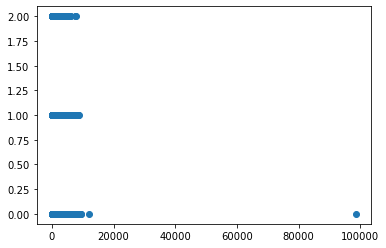

In [87]:
plt.scatter(df6['flow'],df6['crash_num'])

#### crash_happened column for making logit model

In [88]:
df6['crash_happened'] = np.where(df6['crash'] == 'yes', 1, 0)

In [89]:
df6.head()

,zone_id,month,day,hour,BEGIN_POST,END_POST,crash,speed,flow,crash_num,link,crash_happened
0,3481,2,1,0,12.0,13.0,no,71.455240,894,0.0,12_13,0
1,3481,2,1,1,12.0,13.0,no,70.977359,587,0.0,12_13,0
2,3481,2,1,2,12.0,13.0,no,71.767098,416,0.0,12_13,0
3,3481,2,1,3,12.0,13.0,no,69.573708,372,0.0,12_13,0
4,3481,2,1,4,12.0,13.0,no,68.823282,456,0.0,12_13,0


## Models

In [90]:
links = df6['link'].unique()

In [91]:
links

array(['12_13', '13_14', '13_10', '8_16', '15_16', '14_15', '9_15',
       '14_17', '1_2', '2_4', '5_11', '1_3', '3_5', '11_12', '9_14',
       '8_9', '4_6', '4_3', '10_14', '5_10'], dtype=object)

link 12_13


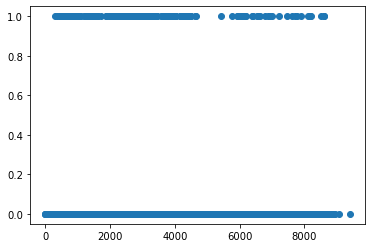

link 13_14


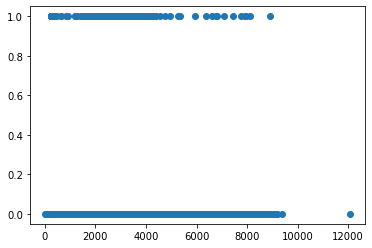

link 13_10


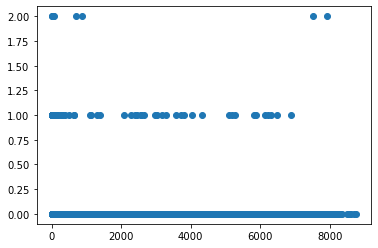

link 8_16


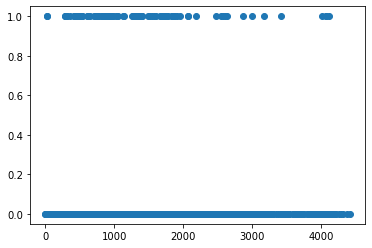

link 15_16


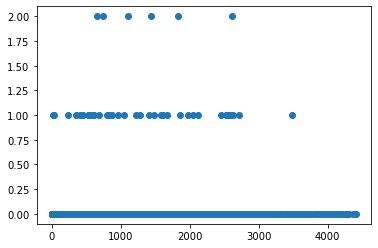

link 14_15


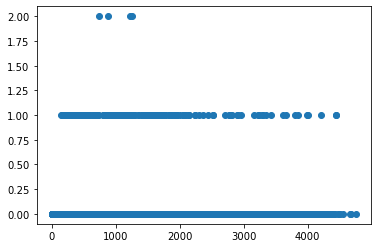

link 9_15


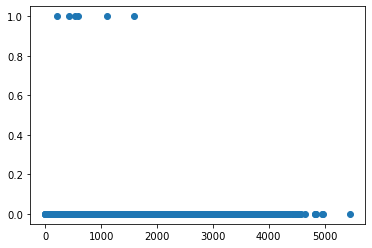

link 14_17


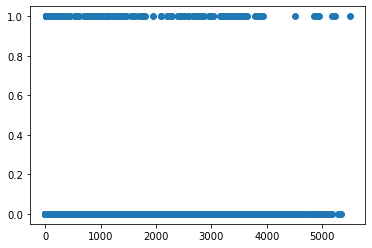

link 1_2


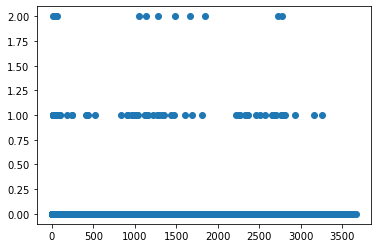

link 2_4


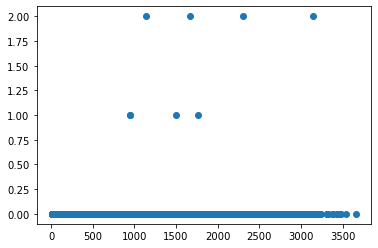

link 5_11


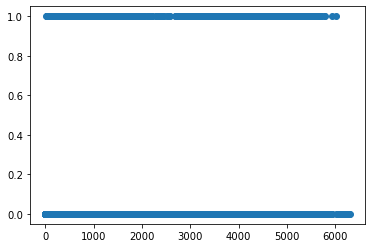

link 1_3


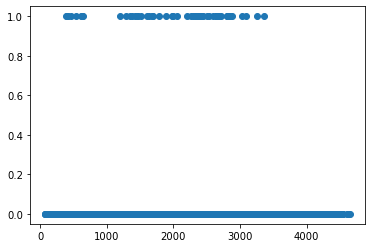

link 3_5


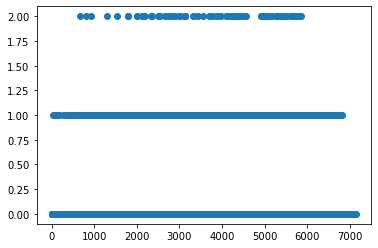

link 11_12


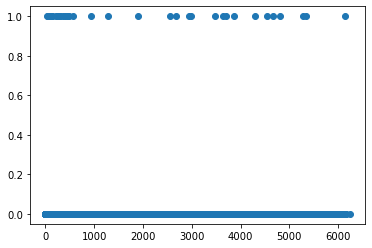

link 9_14


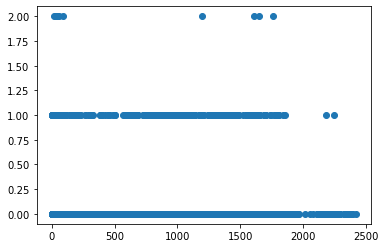

link 8_9


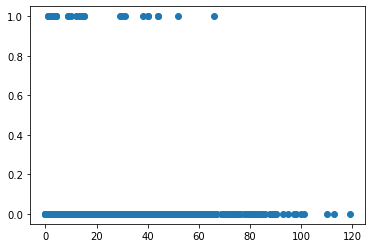

link 4_6


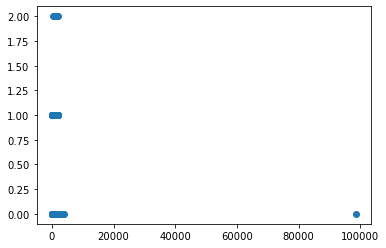

link 4_3


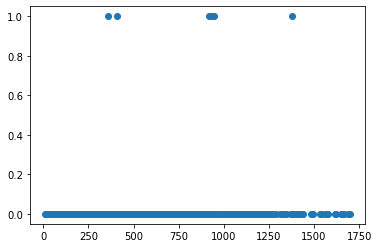

link 10_14


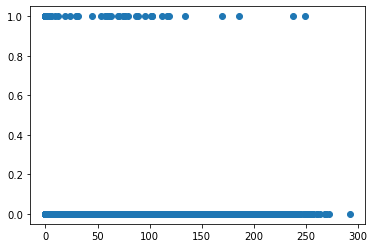

link 5_10


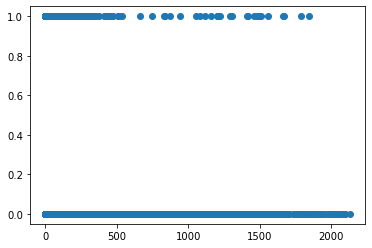

In [93]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    plt.scatter(df7['flow'],df7['crash_num'])
    plt.show()
    

### Crash happened or not for each link

In [35]:
from statsmodels.formula.api import logit

#### crash happened vs (speed + flow)

In [131]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    model = logit("crash_happened ~ flow + speed",data =  df7).fit()
    print(model.summary())
    mfx = model.get_margeff()
    print(mfx.summary())
    

link 12_13
Optimization terminated successfully.
         Current function value: 0.062121
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                21420
Model:                          Logit   Df Residuals:                    21417
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.05318
Time:                        20:36:09   Log-Likelihood:                -1330.6
converged:                       True   LL-Null:                       -1405.4
Covariance Type:            nonrobust   LLR p-value:                 3.480e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9277      0.750     -7.907      0.000      -7.397      -4.458
flow           0.0

        Logit Marginal Effects       
Dep. Variable:         crash_happened
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
flow        1.152e-05   1.64e-06      7.020      0.000    8.31e-06    1.47e-05
speed      -4.222e-05      0.000     -0.306      0.759      -0.000       0.000
link 9_15
Optimization terminated successfully.
         Current function value: 0.010438
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                 4296
Model:                          Logit   Df Residuals:                     4293
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01313
Time:                   

link 1_3
Optimization terminated successfully.
         Current function value: 0.039010
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                 8080
Model:                          Logit   Df Residuals:                     8077
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.05692
Time:                        20:36:10   Log-Likelihood:                -315.20
converged:                       True   LL-Null:                       -334.23
Covariance Type:            nonrobust   LLR p-value:                 5.468e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0448      0.510     -5.973      0.000      -4.044      -2.046
flow           0.000

Optimization terminated successfully.
         Current function value: 0.036966
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                14671
Model:                          Logit   Df Residuals:                    14668
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01065
Time:                        20:36:10   Log-Likelihood:                -542.33
converged:                       True   LL-Null:                       -548.17
Covariance Type:            nonrobust   LLR p-value:                  0.002914
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0284      0.347    -17.379      0.000      -6.708      -5.349
flow           0.0001   3.61

#### crash happened vs flow

In [132]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    model = logit("crash_happened ~ flow",data =  df7).fit()
    print(model.summary())
    mfx = model.get_margeff()
    print(mfx.summary())

link 12_13
Optimization terminated successfully.
         Current function value: 0.062140
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                21420
Model:                          Logit   Df Residuals:                    21418
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.05290
Time:                        20:40:49   Log-Likelihood:                -1331.0
converged:                       True   LL-Null:                       -1405.4
Covariance Type:            nonrobust   LLR p-value:                 3.336e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2837      0.105    -50.147      0.000      -5.490      -5.077
flow           0.0

link 14_17
Optimization terminated successfully.
         Current function value: 0.129569
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                 7484
Model:                          Logit   Df Residuals:                     7482
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01619
Time:                        20:40:49   Log-Likelihood:                -969.69
converged:                       True   LL-Null:                       -985.65
Covariance Type:            nonrobust   LLR p-value:                 1.617e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8313      0.096    -39.924      0.000      -4.019      -3.643
flow           0.0

        Logit Marginal Effects       
Dep. Variable:         crash_happened
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
flow         1.02e-05   4.86e-07     20.985      0.000    9.24e-06    1.11e-05
link 11_12
Optimization terminated successfully.
         Current function value: 0.028093
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                 8080
Model:                          Logit   Df Residuals:                     8078
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01654
Time:                        20:40:50   Log-Likelihood:                -226.99
converged:             

        Logit Marginal Effects       
Dep. Variable:         crash_happened
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
flow        4.204e-06   1.23e-06      3.422      0.001     1.8e-06    6.61e-06


#### crash happened vs speed 

In [133]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    model = logit("crash_happened ~ speed",data =  df7).fit()
    print(model.summary())
    mfx = model.get_margeff()
    print(mfx.summary())

link 12_13
Optimization terminated successfully.
         Current function value: 0.065498
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                21420
Model:                          Logit   Df Residuals:                    21418
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                0.001713
Time:                        20:41:02   Log-Likelihood:                -1403.0
converged:                       True   LL-Null:                       -1405.4
Covariance Type:            nonrobust   LLR p-value:                   0.02822
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8646      0.698     -8.399      0.000      -7.233      -4.496
speed          0.0

                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                 4296
Model:                          Logit   Df Residuals:                     4294
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                0.009941
Time:                        20:41:02   Log-Likelihood:                -44.986
converged:                       True   LL-Null:                       -45.438
Covariance Type:            nonrobust   LLR p-value:                    0.3419
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4293      2.162     -3.898      0.000     -12.668      -4.191
speed          0.0349      0.038      0.910      0.363      -0.040       0.110
        Logit Marginal Effects       
Dep. Variable:

                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                43212
Model:                          Logit   Df Residuals:                    43210
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01311
Time:                        20:41:03   Log-Likelihood:                -6274.2
converged:                       True   LL-Null:                       -6357.6
Covariance Type:            nonrobust   LLR p-value:                 3.797e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8917      0.104    -18.219      0.000      -2.095      -1.688
speed         -0.0235      0.002    -14.094      0.000      -0.027      -0.020
        Logit Marginal Effects       
Dep. Variable:

                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                29295
Model:                          Logit   Df Residuals:                    29293
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:               2.733e-06
Time:                        20:41:03   Log-Likelihood:                -1151.7
converged:                       True   LL-Null:                       -1151.7
Covariance Type:            nonrobust   LLR p-value:                    0.9368
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0166      0.142    -35.209      0.000      -5.296      -4.737
speed         -0.0003      0.004     -0.079      0.937      -0.007       0.007
        Logit Marginal Effects       
Dep. Variable:

### Multinomial model

In [20]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#### For all links together

In [137]:
x = df6[['speed', 'flow']]
x = sm.add_constant(x)
y_var = df6['crash_num']
xTrain, xTest, yTrain, yTest = train_test_split(x, y_var,train_size = 0.8, random_state = 2)
Logit = sm.MNLogit(yTrain, xTrain)
results = Logit.fit()
print(results.summary())

         Current function value: 0.078827
         Iterations: 35


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:               231222
Model:                        MNLogit   Df Residuals:                   231216
Method:                           MLE   Df Model:                            4
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.04298
Time:                        21:38:23   Log-Likelihood:                -18227.
converged:                      False   LL-Null:                       -19045.
Covariance Type:            nonrobust   LLR p-value:                     0.000
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2849      0.048    -89.244      0.000      -4.379      -4.191
speed          -0.0093      0.001    -10.811      0.000      -0.011      -0.008
flow            0.0004   8.46e-06     44.470    

##### Using both speed and flow

In [139]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed', 'flow']]
    x = sm.add_constant(x)
    y_var = df7['crash_num']
    xTrain, xTest, yTrain, yTest = train_test_split(x, y_var,train_size = 0.8, random_state = 2)
    Logit = sm.MNLogit(yTrain, xTrain)
    results = Logit.fit()
    print(results.summary())

link 12_13
Optimization terminated successfully.
         Current function value: 0.059021
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                17136
Model:                        MNLogit   Df Residuals:                    17133
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.05972
Time:                        21:40:36   Log-Likelihood:                -1011.4
converged:                       True   LL-Null:                       -1075.6
Covariance Type:            nonrobust   LLR p-value:                 1.268e-28
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.2175      0.879     -7.077      0.000      -7.939      -4.496
speed          

Optimization terminated successfully.
         Current function value: 0.120526
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                 5987
Model:                        MNLogit   Df Residuals:                     5984
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.03086
Time:                        21:40:36   Log-Likelihood:                -721.59
converged:                       True   LL-Null:                       -744.57
Covariance Type:            nonrobust   LLR p-value:                 1.049e-10
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.1057      0.346    -14.746      0.000      -5.784      -4.427
speed           0.0242    

                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                15773
Model:                        MNLogit   Df Residuals:                    15767
Method:                           MLE   Df Model:                            4
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.02371
Time:                        21:40:38   Log-Likelihood:                -2007.4
converged:                       True   LL-Null:                       -2056.2
Covariance Type:            nonrobust   LLR p-value:                 3.328e-20
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.7870      0.154    -18.057      0.000      -3.090      -2.485
speed          -0.0364      0.005     -6.665      0.000      -0.047      -0.026
flow            0.0009   9.93e-05      9.444    

##### Using speed 

In [140]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed']]
    x = sm.add_constant(x)
    y_var = df7['crash_num']
    xTrain, xTest, yTrain, yTest = train_test_split(x, y_var,train_size = 0.8, random_state = 2)
    Logit = sm.MNLogit(yTrain, xTrain)
    results = Logit.fit()
    print(results.summary())

link 12_13
Optimization terminated successfully.
         Current function value: 0.062643
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                17136
Model:                        MNLogit   Df Residuals:                    17134
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                0.002015
Time:                        21:43:14   Log-Likelihood:                -1073.4
converged:                       True   LL-Null:                       -1075.6
Covariance Type:            nonrobust   LLR p-value:                   0.03732
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.0646      0.811     -7.474      0.000      -7.655      -4.474
speed          

                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                11960
Model:                        MNLogit   Df Residuals:                    11956
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                0.001129
Time:                        21:43:14   Log-Likelihood:                -528.22
converged:                       True   LL-Null:                       -528.82
Covariance Type:            nonrobust   LLR p-value:                    0.5503
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.0111      0.269    -18.642      0.000      -5.538      -4.484
speed          -0.0011      0.005     -0.220      0.826      -0.011       0.008
------------------------------------------------

                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                15773
Model:                        MNLogit   Df Residuals:                    15769
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                0.002884
Time:                        21:43:16   Log-Likelihood:                -2050.2
converged:                       True   LL-Null:                       -2056.2
Covariance Type:            nonrobust   LLR p-value:                  0.002658
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1248      0.148    -21.070      0.000      -3.416      -2.834
speed          -0.0144      0.005     -3.096      0.002      -0.024      -0.005
------------------------------------------------

##### Using flow

In [141]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['flow']]
    x = sm.add_constant(x)
    y_var = df7['crash_num']
    xTrain, xTest, yTrain, yTest = train_test_split(x, y_var,train_size = 0.8, random_state = 2)
    Logit = sm.MNLogit(yTrain, xTrain)
    results = Logit.fit()
    print(results.summary())

link 12_13
Optimization terminated successfully.
         Current function value: 0.059048
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                17136
Model:                        MNLogit   Df Residuals:                    17134
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.05928
Time:                        21:43:31   Log-Likelihood:                -1011.8
converged:                       True   LL-Null:                       -1075.6
Covariance Type:            nonrobust   LLR p-value:                 1.419e-29
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.3929      0.122    -44.264      0.000      -5.632      -5.154
flow           

                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                11960
Model:                        MNLogit   Df Residuals:                    11956
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01423
Time:                        21:43:32   Log-Likelihood:                -521.29
converged:                       True   LL-Null:                       -528.82
Covariance Type:            nonrobust   LLR p-value:                 0.0005388
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.4041      0.158    -34.150      0.000      -5.714      -5.094
flow            0.0005      0.000      4.000      0.000       0.000       0.001
------------------------------------------------

                          MNLogit Regression Results                          
Dep. Variable:              crash_num   No. Observations:                15773
Model:                        MNLogit   Df Residuals:                    15769
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                 0.01116
Time:                        21:43:33   Log-Likelihood:                -2033.2
converged:                       True   LL-Null:                       -2056.2
Covariance Type:            nonrobust   LLR p-value:                 1.083e-10
crash_num=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7901      0.062    -60.873      0.000      -3.912      -3.668
flow            0.0006   8.85e-05      6.945      0.000       0.000       0.001
------------------------------------------------

### Plot data to visulize relationship

In [9]:
import matplotlib.pyplot as plt

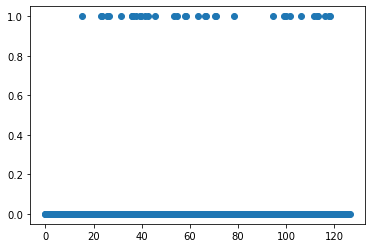

In [16]:
df7=df6[df6['link'] == '11_12']
plt.scatter(df7['speed'],df7['crash_num'])

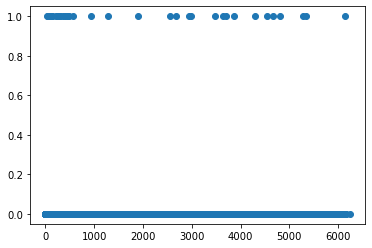

In [17]:
plt.scatter(df7['flow'],df7['crash_num'])

link 12_13
link 13_14
link 13_10
link 8_16
link 15_16
link 14_15
link 9_15
link 14_17
link 1_2
link 2_4
link 5_11
link 1_3
link 3_5
link 11_12
link 9_14
link 8_9
link 4_6
link 4_3
link 10_14
link 5_10


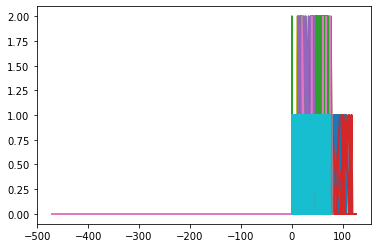

In [145]:
'''for l in links:
    print('link', l )
    df7=df6[df6['link'] == l]
    plt.plot(df7['speed'],df7['crash_num'])
    #plt.plot(df7['flow'],df7['crash_happened'])'''

### OLS

#### Speed and flow

In [180]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed','flow']]
    y = df7['crash_num']
    results = sm.OLS(y,x).fit()
    print(results.summary())

link 12_13
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.022
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              237.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                   9.74e-103
Time:                        23:33:28   Log-Likelihood:                          17087.
No. Observations:               21420   AIC:                                 -3.417e+04
Df Residuals:                   21418   BIC:                                 -3.415e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

link 1_2
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              47.07
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    4.17e-21
Time:                        23:33:28   Log-Likelihood:                          12750.
No. Observations:               14950   AIC:                                 -2.550e+04
Df Residuals:                   14948   BIC:                                 -2.548e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

link 8_9
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              10.67
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    2.41e-05
Time:                        23:33:29   Log-Likelihood:                          3141.0
No. Observations:                3221   AIC:                                     -6278.
Df Residuals:                    3219   BIC:                                     -6266.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

#### Flow

In [181]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['flow']]
    y = df7['crash_num']
    results = sm.OLS(y,x).fit()
    print(results.summary())

link 12_13
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.022
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              474.6
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                   4.36e-104
Time:                        23:34:00   Log-Likelihood:                          17087.
No. Observations:               21420   AIC:                                 -3.417e+04
Df Residuals:                   21419   BIC:                                 -3.416e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              191.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    6.31e-43
Time:                        23:34:00   Log-Likelihood:                          2706.8
No. Observations:                7484   AIC:                                     -5412.
Df Residuals:                    7483   BIC:                                     -5405.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              376.6
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    4.13e-83
Time:                        23:34:01   Log-Likelihood:                          6854.2
No. Observations:               19717   AIC:                                 -1.371e+04
Df Residuals:                   19716   BIC:                                 -1.370e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Speed

In [182]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed']]
    y = df7['crash_num']
    results = sm.OLS(y,x).fit()
    print(results.summary())

link 12_13
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              267.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    9.20e-60
Time:                        23:34:14   Log-Likelihood:                          16985.
No. Observations:               21420   AIC:                                 -3.397e+04
Df Residuals:                   21419   BIC:                                 -3.396e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

link 1_2
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              74.93
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    5.36e-18
Time:                        23:34:15   Log-Likelihood:                          12741.
No. Observations:               14950   AIC:                                 -2.548e+04
Df Residuals:                   14949   BIC:                                 -2.547e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

link 8_9
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              15.68
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    7.67e-05
Time:                        23:34:15   Log-Likelihood:                          3138.2
No. Observations:                3221   AIC:                                     -6274.
Df Residuals:                    3220   BIC:                                     -6268.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Exponential

#### Speed and flow

In [183]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed','flow']]
    y = df7['crash_num']
    results = sm.OLS(y,np.log1p(x)).fit()
    print(results.summary())

link 12_13
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              218.7
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    9.32e-95
Time:                        23:37:44   Log-Likelihood:                          17069.
No. Observations:               21420   AIC:                                 -3.413e+04
Df Residuals:                   21418   BIC:                                 -3.412e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):              0.035
Method:                 Least Squares   F-statistic:                              137.8
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    1.72e-59
Time:                        23:37:44   Log-Likelihood:                          2747.8
No. Observations:                7484   AIC:                                     -5492.
Df Residuals:                    7482   BIC:                                     -5478.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

link 8_9
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              13.24
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    1.87e-06
Time:                        23:37:45   Log-Likelihood:                          3143.6
No. Observations:                3221   AIC:                                     -6283.
Df Residuals:                    3219   BIC:                                     -6271.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


MissingDataError: exog contains inf or nans

#### Speed

In [184]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed']]
    y = df7['crash_num']
    results = sm.OLS(y,np.log1p(x)).fit()
    print(results.summary())

link 12_13
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              265.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    3.24e-59
Time:                        23:39:05   Log-Likelihood:                          16984.
No. Observations:               21420   AIC:                                 -3.397e+04
Df Residuals:                   21419   BIC:                                 -3.396e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

link 14_17
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              249.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    2.61e-55
Time:                        23:39:05   Log-Likelihood:                          2735.2
No. Observations:                7484   AIC:                                     -5468.
Df Residuals:                    7483   BIC:                                     -5461.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

link 9_14
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                              537.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                   2.94e-117
Time:                        23:39:05   Log-Likelihood:                          6932.6
No. Observations:               19717   AIC:                                 -1.386e+04
Df Residuals:                   19716   BIC:                                 -1.386e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


MissingDataError: exog contains inf or nans

#### Flow

In [185]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['flow']]
    y = df7['crash_num']
    results = sm.OLS(y,np.log1p(x)).fit()
    print(results.summary())

link 12_13
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.015
Method:                 Least Squares   F-statistic:                              316.8
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    2.37e-70
Time:                        23:39:35   Log-Likelihood:                          17010.
No. Observations:               21420   AIC:                                 -3.402e+04
Df Residuals:                   21419   BIC:                                 -3.401e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

link 1_2
                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              114.6
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    1.20e-26
Time:                        23:39:35   Log-Likelihood:                          12760.
No. Observations:               14950   AIC:                                 -2.552e+04
Df Residuals:                   14949   BIC:                                 -2.551e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

                                 OLS Regression Results                                
Dep. Variable:              crash_num   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              25.64
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    4.34e-07
Time:                        23:39:36   Log-Likelihood:                          3143.2
No. Observations:                3221   AIC:                                     -6284.
Df Residuals:                    3220   BIC:                                     -6278.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Quadratic

In [18]:
from sklearn.preprocessing import PolynomialFeatures

#### Speed + Flow

In [22]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed','flow']]
    y = df7['crash_num']
    polynomial_features= PolynomialFeatures(degree=4)
    xp = polynomial_features.fit_transform(x)
    results = sm.OLS(y,xp).fit()
    print(results.summary())

link 12_13
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     72.69
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.01e-47
Time:                        10:34:45   Log-Likelihood:                 17092.
No. Observations:               21420   AIC:                        -3.418e+04
Df Residuals:                   21416   BIC:                        -3.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.758e-09   4.65e-09      0.3

link 9_15
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3529
Date:                Mon, 26 Oct 2020   Prob (F-statistic):              0.842
Time:                        10:34:45   Log-Likelihood:                 8028.2
No. Observations:                4296   AIC:                        -1.605e+04
Df Residuals:                    4291   BIC:                        -1.601e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.987e-06      0.002     -0.00

                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.14e-161
Time:                        10:34:45   Log-Likelihood:                 9603.2
No. Observations:               43212   AIC:                        -1.920e+04
Df Residuals:                   43208   BIC:                        -1.916e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.148e-08   8.15e-09      3.864      0.0

                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.385
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.33e-07
Time:                        10:34:45   Log-Likelihood:                 32264.
No. Observations:               29295   AIC:                        -6.452e+04
Df Residuals:                   29290   BIC:                        -6.448e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      5.726      0.0

#### Flow

In [24]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['flow']]
    y = df7['crash_num']
    polynomial_features= PolynomialFeatures(degree=4)
    xp = polynomial_features.fit_transform(x)
    results = sm.OLS(y,xp).fit()
    print(results.summary())

link 12_13
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     72.69
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.01e-47
Time:                        10:35:33   Log-Likelihood:                 17092.
No. Observations:               21420   AIC:                        -3.418e+04
Df Residuals:                   21416   BIC:                        -3.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.758e-09   4.65e-09      0.3

                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3529
Date:                Mon, 26 Oct 2020   Prob (F-statistic):              0.842
Time:                        10:35:33   Log-Likelihood:                 8028.2
No. Observations:                4296   AIC:                        -1.605e+04
Df Residuals:                    4291   BIC:                        -1.601e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.987e-06      0.002     -0.004      0.9

                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.14e-161
Time:                        10:35:34   Log-Likelihood:                 9603.2
No. Observations:               43212   AIC:                        -1.920e+04
Df Residuals:                   43208   BIC:                        -1.916e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.148e-08   8.15e-09      3.864      0.0

#### Speed

In [199]:
for l in links:
    df7=df6[df6['link'] == l]
    print('link', l )
    x = df7[['speed']]
    y = df7['crash_num']
    polynomial_features= PolynomialFeatures(degree=5)
    xp = polynomial_features.fit_transform(x)
    results = sm.OLS(y,xp).fit()
    print(results.summary())

link 12_13
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.419
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.214
Time:                        23:46:34   Log-Likelihood:                 16987.
No. Observations:               21420   AIC:                        -3.396e+04
Df Residuals:                   21414   BIC:                        -3.391e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.555e-05      0.051     -0.0

link 9_15
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2393
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.945
Time:                        23:46:35   Log-Likelihood:                 8028.1
No. Observations:                4296   AIC:                        -1.604e+04
Df Residuals:                    4290   BIC:                        -1.601e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.016      0.04

link 1_3
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.659
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.39e-08
Time:                        23:46:35   Log-Likelihood:                 8670.7
No. Observations:                8080   AIC:                        -1.733e+04
Df Residuals:                    8074   BIC:                        -1.729e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1144      0.081      1.409

                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.214
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.300
Time:                        23:46:35   Log-Likelihood:                 4116.8
No. Observations:                2556   AIC:                            -8222.
Df Residuals:                    2550   BIC:                            -8187.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0786      0.521     -0.151      0.8

In [52]:
df7=df6[df6['link'] == '12_13']
print('link', '12_13')
x = df7[['flow']]
y = df7['crash_num']
polynomial_features= PolynomialFeatures(degree=4)
xp = polynomial_features.fit_transform(x)
results = sm.OLS(y,xp).fit()
print(results.summary())
print(results.predict(df7['flow']))

link 12_13
                            OLS Regression Results                            
Dep. Variable:              crash_num   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     72.69
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           9.01e-47
Time:                        10:53:34   Log-Likelihood:                 17092.
No. Observations:               21420   AIC:                        -3.418e+04
Df Residuals:                   21416   BIC:                        -3.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.758e-09   4.65e-09      0.3

ValueError: shapes (1,21420) and (5,) not aligned: 21420 (dim 1) != 5 (dim 0)

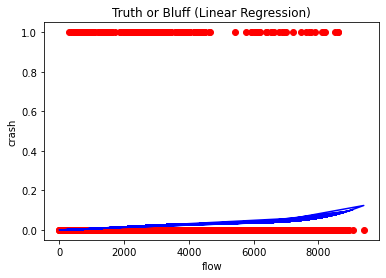

In [33]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x, results.predict(polynomial_features.fit_transform(x)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('flow')
    plt.ylabel('crash')
    plt.show()
    return 
viz_polymonial()

In [36]:
df7=df6[df6['link'] == "12_13"]
print('link', '12_13' )
model = logit("crash_happened ~ flow",data =  df7).fit()
print(model.summary())
mfx = model.get_margeff()
print(mfx.summary())

link 12_13
Optimization terminated successfully.
         Current function value: 0.062140
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         crash_happened   No. Observations:                21420
Model:                          Logit   Df Residuals:                    21418
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                 0.05290
Time:                        10:47:02   Log-Likelihood:                -1331.0
converged:                       True   LL-Null:                       -1405.4
Covariance Type:            nonrobust   LLR p-value:                 3.336e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2837      0.105    -50.147      0.000      -5.490      -5.077
flow           0.0

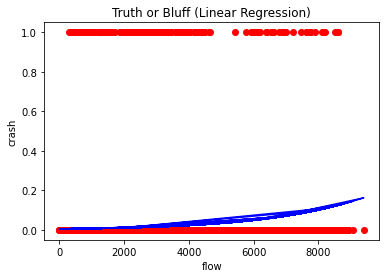

In [39]:
x = df7['flow']
y = df7['crash_happened']
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x, model.predict(x), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('flow')
    plt.ylabel('crash')
    plt.show()
    return 
viz_polymonial()

In [1]:
crash_zone =df2['zone_id']

NameError: name 'df2' is not defined